In [35]:
%matplotlib inline
import numpy as np
import re

In [3]:
'''Parity game.'''

'Parity game.'

In [4]:
#Moves in the game.
input_set = ['E', 'V', 'P', 'Z']
num_moves = 100
input_dir = 'inputs/'

#Probability each move respectively.
#Collection of random numbers
r = np.random.rand(len(input_set))
#Normalize
p = r / sum(r)

#Example
np.append(np.random.choice(input_set, num_moves, p=p), ['Q'] , axis=0)

array(['V', 'V', 'E', 'Z', 'E', 'E', 'V', 'V', 'Z', 'Z', 'P', 'P', 'P',
       'P', 'V', 'Z', 'P', 'E', 'Z', 'E', 'P', 'E', 'E', 'P', 'Z', 'V',
       'E', 'V', 'V', 'P', 'E', 'Z', 'P', 'E', 'Z', 'V', 'P', 'E', 'Z',
       'V', 'E', 'P', 'V', 'E', 'Z', 'V', 'E', 'E', 'P', 'Z', 'E', 'V',
       'P', 'V', 'P', 'V', 'P', 'P', 'Z', 'P', 'E', 'Z', 'P', 'E', 'E',
       'P', 'Z', 'Z', 'P', 'E', 'Z', 'E', 'P', 'E', 'P', 'P', 'Z', 'V',
       'Z', 'E', 'P', 'E', 'Z', 'V', 'P', 'P', 'P', 'V', 'Z', 'E', 'P',
       'P', 'P', 'P', 'P', 'P', 'E', 'E', 'P', 'E', 'Q'], 
      dtype='<U1')

In [5]:
#Make the dir
!mkdir -p {input_dir}

In [6]:
!make

../../datasources/6502/ext/install/bin/cc65 -D__6502__ -t none -O -Oi --cpu 6502 jaswitch-6502-cc65.c
../../datasources/6502/ext/install/bin/ca65 --cpu 6502 jaswitch-6502-cc65.s -l jaswitch-6502-cc65.lst
../../datasources/6502/ext/install/bin/ld65 -o jaswitch-6502-cc65 -C ../../datasources/6502/apps/cc/apps/bu6502.cfg  jaswitch-6502-cc65.o ../../datasources/6502/apps/cc/apps/bu6502.lib   -m jaswitch-6502-cc65.map
[ -d 'backup' ] || mkdir backup
mv *.lst *.map *.s backup
[ -d 'images' ] || mkdir 'images'
mv jaswitch-6502-cc65 jaswitch-6502-cc65.img
mv *.img 'images'
rm jaswitch-6502-cc65.o


In [8]:
#Generate input files.
for i in range(3):
    r = np.random.rand(len(input_set))
    #Normalize
    p = r / sum(r)
    #Stringify list of moves.
    moves = np.array_str(np.append(np.random.choice(input_set, num_moves, p=p), ['Q'] , axis=0))
    #Remove formatting, clean this up.
    moves = moves.replace('\'', '').replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
    file_name = "E:%.2f_V:%.2f_P:%.2f_Z:%.2f_switch" % (tuple(p))
    text_file = open(input_dir + file_name, "w")
    text_file.write(moves)
    text_file.close()

In [9]:
%%bash
#Generate traces using image and inputs.
#Is it safe to background em?
mkdir -p traces
for i in $(ls inputs) 
    do
    ../../datasources/6502/6502 -t sv -o traces/$i.trc images/jaswitch-6502-cc65.img < inputs/$i /dev/null 2> /dev/null &
done

EVEN
ODD
EVEN
0
ODD
2
ODD
EVEN
0
ODD
2
EVEN
ODDEV
EN
EVEN
3
7ODD

0ODED
VEN

ODD
ODD
40

EVEN
9
4
0
14
EVE
N
EVEN
01

6EVEVEN
EN

EVEN
0
8
0
EVEN
E0VEN

0
0
3EVEN

ODD
EVEN
0EVEN
E
VEN
4
07

EVEN
EVEN
EVEN
EVENO
DD
0
0
0
0
ODD
ODD
0EV
EN
ODD
EVEN
EVEN
ODD
ODD
0
EVEN
23

ODD
03

EVEN
4EVE
N
1
08

ODD
2
EVE0N

11
2
0
ODD
EVEN
2
EVEN
EVEN
17EVEN

0
1
018

EVEN
EVEN
EEVEVEN
N
EVEN
EVEEVN
EN
EVENEVE
N
18
10

EVEN
ODD
19EVEN

EVEN
EVEN
EVEN
EVEN
EVEN
EVEN
EVEN
20
EVEN
20
EVEN
EVEN
EVEN
ODD
EVEN
ODD
ODD
0ODD

EVEN
ODD
0
ODD
EVEN
EVEN
1
0
1EVEN

EVEN
EVEN
EVEN
EVEN
EVEN
0
EVEN
EVEN


In [24]:
#Generate excited bit masks for all
#Load in ith trace, slice out excited portion, stack. 
trc = np.fromfile('traces/E:0.01_V:0.21_P:0.35_Z:0.43_switch.trc', dtype='uint8')

In [25]:
sz_st_vec_bytes = 8 + 2**16
num_states = trc.size / (sz_st_vec_bytes)

trc = np.reshape(trc, (int(num_states), -1))

In [26]:
trc.shape

(42308, 65544)

In [31]:
np.unique(trc)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [33]:
val, count = np.unique(trc, return_counts = True)

In [34]:
val.nbytes

255

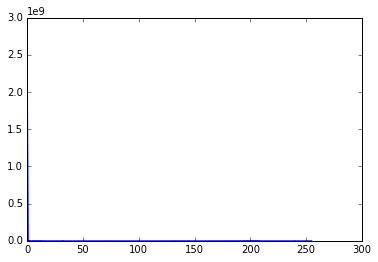

In [40]:
#Distribution of byte vals. Can't see anything because of 0.
import matplotlib.pyplot as plt
plt.plot(val, count)

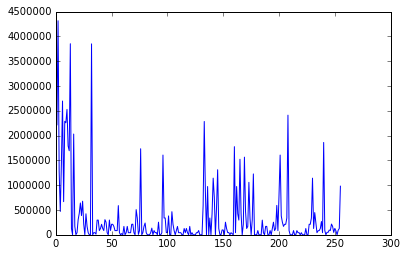

In [41]:
#Remove 0.
plt.plot(val[1:], count[1:])

In [44]:
#Num gigs
trc.nbytes / 2**30

2.5825906097888947

In [47]:
#Sparse rep
trc

array([[  0,   5,   0, ...,   5, 118,  12],
       [  2,   5,   0, ...,   5, 118,  12],
       [  3,   5,   0, ...,   5, 118,  12],
       ..., 
       [231,   9,   0, ...,   5, 118,  12],
       [ 27,   5,   0, ...,   5, 118,  12],
       [ 28,   5,   0, ...,   5, 118,  12]], dtype=uint8)